In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

C:\Users\AI\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   99
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 651.176
Date:                Sat, 27 Apr 2024   AIC                          -1290.352
Time:                        12:58:06   BIC                          -1274.842
Sample:                             0   HQIC                         -1284.078
                                 - 99                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -2.6699      0.010   -268.500      0.000      -2.689      -2.650
ar.L2         -1.6349      0.015   -108.076      0.000      -1.665      -1.605
ar.L3          1.7310      0.010    170.144      0.0

C:\Users\AI\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\AI\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


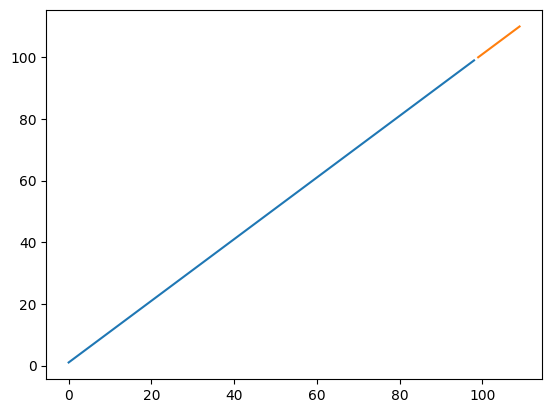

In [12]:
# genrating random data for arima model

data = [x for x in range(1, 100)]

# fit model

model = ARIMA(data, order=(5, 1, 0)).fit()


# summary of the model

print(model.summary())

# predicting the future values

pred = model.predict(start=len(data), end=len(data)+10, typ='levels')

print(pred)

# plotting the data

plt.plot(data)

plt.plot([None for i in data] + [x for x in pred])

plt.show()












In [19]:
# checking stattionarity of the data

from statsmodels.tsa.stattools import adfuller

result = adfuller(data)

print(result)

print('ADF Statistic: %f' % result[0])

print('p-value: %f' % result[1])

print('is data stationary: %s' % ('No', 'Yes')[result[1] < 0.05])







(inf, 1.0, 1, 97, {'1%': -3.4996365338407074, '5%': -2.8918307730370025, '10%': -2.5829283377617176}, -inf)
ADF Statistic: inf
p-value: 1.000000
is data stationary: No


C:\Users\AI\AppData\Roaming\Python\Python311\site-packages\statsmodels\regression\linear_model.py:956: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


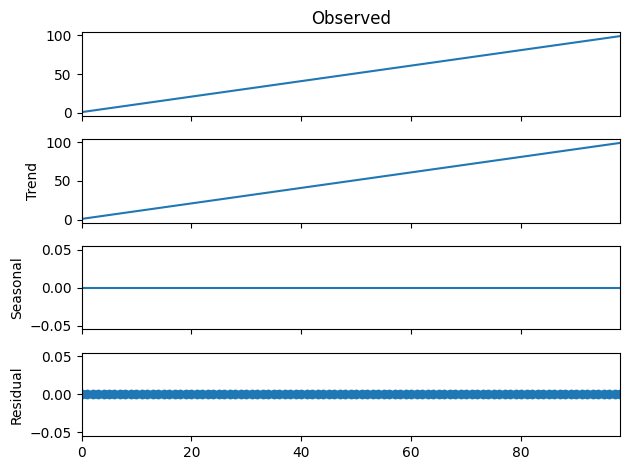

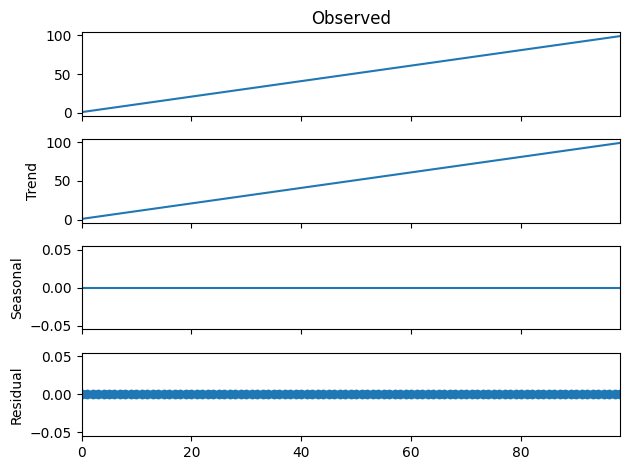

In [20]:
# decomposing the data

from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data, model='additive', period=1)

result.plot()

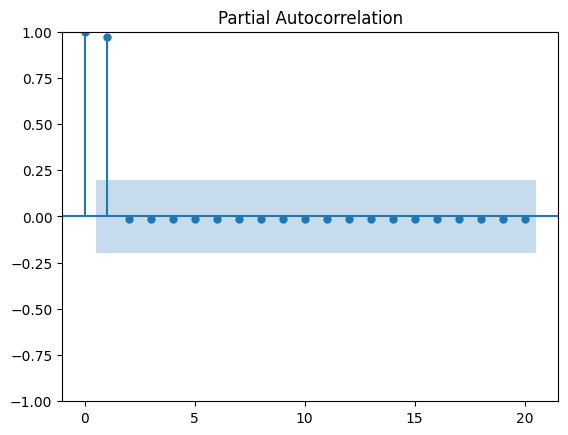

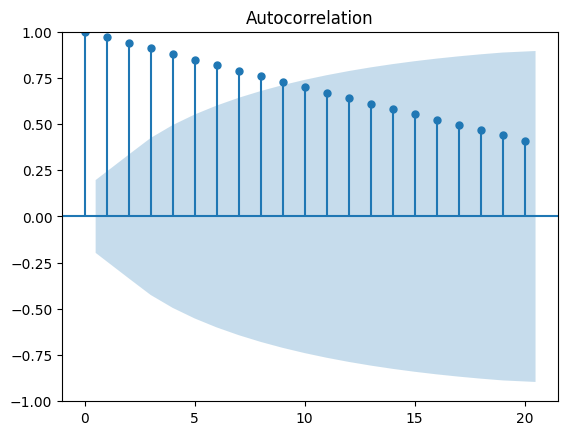

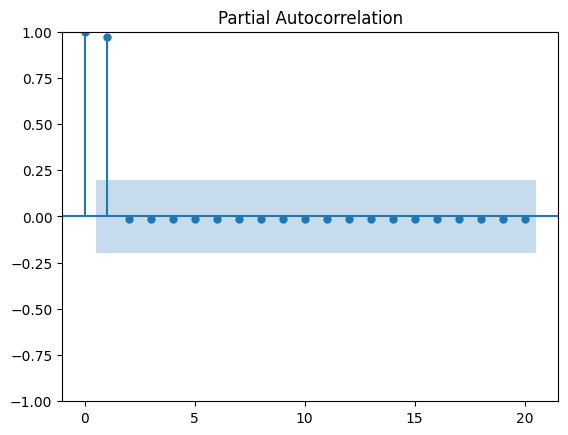

In [22]:
import numpy as np

data = np.array(data)

plot_acf(data)

plot_pacf(data)